In [1]:
%matplotlib inline
from pathlib import Path

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge

from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix, parallel_coordinates
import seaborn as sns

from sklearn.preprocessing import StandardScaler

import numpy as np

from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, ConfusionMatrixDisplay, make_scorer

from sklearn.metrics import r2_score

import os

pd.set_option("display.max_columns", 20)
pd.set_option("display.max_rows", 20)

In [2]:
os.chdir('C:\\Users\\Yuqin Yang\\Documents\\ANOP330\\')

In [3]:
sales_df = pd.read_csv('Data/market_data.csv')
sales_df

,Sale,InStrSpending,Discount,TVSpending,StockRate,Price,Radio,OnlineAdsSpending
0,240368,59.90,0.46,46.30,0.45,12.56,1065,1081.60
1,207276,7.28,0.39,166.91,0.05,5.44,1832,651.24
2,172572,9.81,0.41,73.67,0.06,3.54,587,1066.56
3,82697,46.94,0.27,33.95,0.88,28.90,1407,1855.27
4,141762,2.59,0.26,82.63,0.36,4.66,2057,1608.91
...,...,...,...,...,...,...,...,...
987,26191,19.69,0.18,32.60,0.81,26.22,1840,2238.49
988,132714,19.48,0.23,116.64,0.21,17.53,2156,1564.64
989,32894,22.79,0.49,39.33,0.26,29.23,503,1020.22
990,39091,13.84,0.14,37.71,0.33,23.13,2902,1201.03


In [4]:
sales_df.head()

,Sale,InStrSpending,Discount,TVSpending,StockRate,Price,Radio,OnlineAdsSpending
0,240368,59.90,0.46,46.30,0.45,12.56,1065,1081.60
1,207276,7.28,0.39,166.91,0.05,5.44,1832,651.24
2,172572,9.81,0.41,73.67,0.06,3.54,587,1066.56
3,82697,46.94,0.27,33.95,0.88,28.90,1407,1855.27
4,141762,2.59,0.26,82.63,0.36,4.66,2057,1608.91


In [5]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sale               992 non-null    int64  
 1   InStrSpending      992 non-null    float64
 2   Discount           992 non-null    float64
 3   TVSpending         992 non-null    float64
 4   StockRate          992 non-null    float64
 5   Price              992 non-null    float64
 6   Radio              992 non-null    int64  
 7   OnlineAdsSpending  992 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 62.1 KB


In [6]:
sales_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sale,992.0,171327.118952,81397.843301,1992.00,112479.2500,170390.500,226027.2500,393914.00
InStrSpending,992.0,30.593034,17.493103,0.19,14.8300,31.385,45.6600,59.96
Discount,992.0,0.251139,0.145348,0.00,0.1300,0.250,0.3800,0.50
TVSpending,992.0,98.678740,57.117347,0.13,49.6375,97.510,147.6200,199.91
StockRate,992.0,0.494526,0.286810,0.00,0.2500,0.490,0.7400,1.00
Price,992.0,14.599829,8.715533,0.14,6.9175,14.820,22.1000,29.99
Radio,992.0,1479.569556,885.419636,4.00,708.2500,1413.500,2273.0000,2997.00
OnlineAdsSpending,992.0,1596.504284,927.474787,12.54,786.3275,1595.455,2420.6875,3198.27


## EDA

In [7]:
sales_df.columns

Index(['Sale', 'InStrSpending', 'Discount', 'TVSpending', 'StockRate', 'Price',
       'Radio', 'OnlineAdsSpending'],
      dtype='object')

In [8]:
predictors = ['InStrSpending', 'Discount', 'TVSpending', 'StockRate', 'Price',
       'Radio', 'OnlineAdsSpending']
target = 'Sale'

In [9]:
sales_X = sales_df[predictors]
sales_y = sales_df[target]

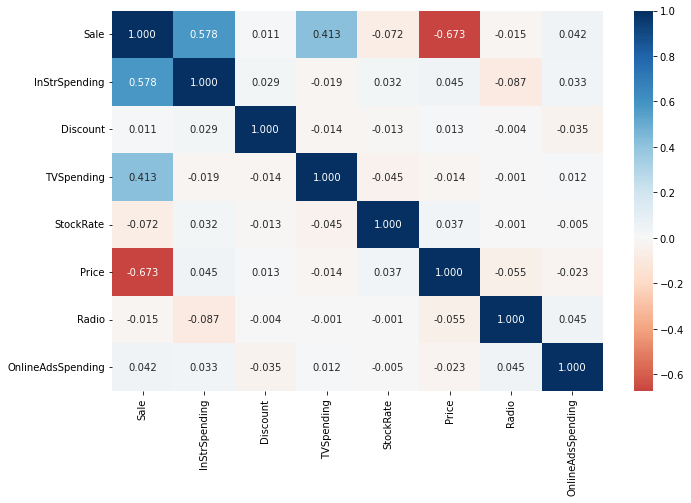

In [10]:
corr = sales_df.corr()
# Include information about values
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(corr, annot=True, fmt=".3f", cmap="RdBu", center=0, ax=ax);
# it's good no redundant, add the target

In [11]:
fig.savefig("corr.png", dpi=300)

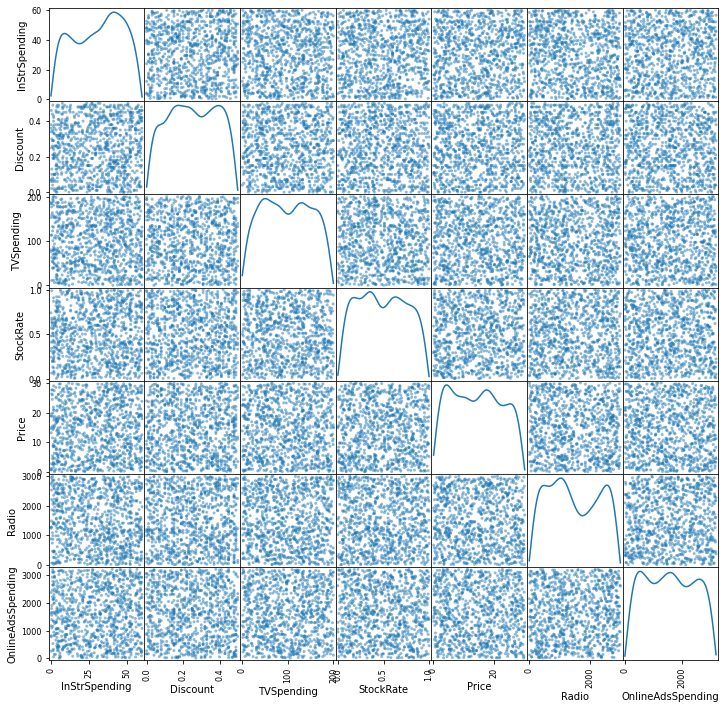

In [12]:
# Add the correlation coefficient to the scatterplots above the diagonal
axes = scatter_matrix(sales_X, alpha=0.5, figsize=(12, 12), diagonal='kde');
plt.show()

### There is no obvious correlation between predictors

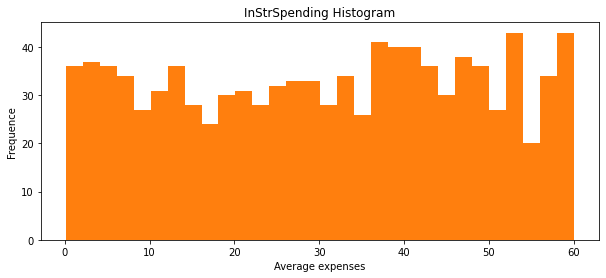

In [13]:
fig, ax = plt.subplots(figsize=(10,4))

ax.set_ylabel("Frequence")
ax.set_xlabel("Average expenses")
ax.set_title("InStrSpending Histogram")
ax.hist(sales_X.InStrSpending, bins=30, color="C1");

In [14]:
fig.savefig("InStrSpending.png", dpi=300)

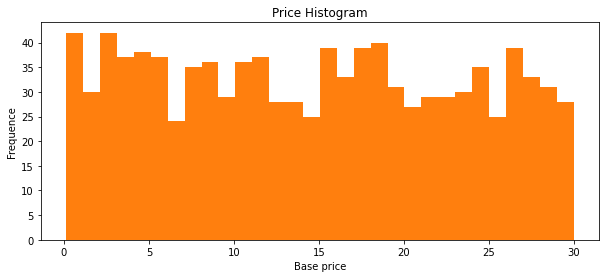

In [15]:
fig, ax = plt.subplots(figsize=(10,4))

ax.set_ylabel("Frequence")
ax.set_xlabel("Base price")
ax.set_title("Price Histogram")
ax.hist(sales_X.Price, bins=30, color="C1");

In [16]:
fig.savefig("Price.png", dpi=300)

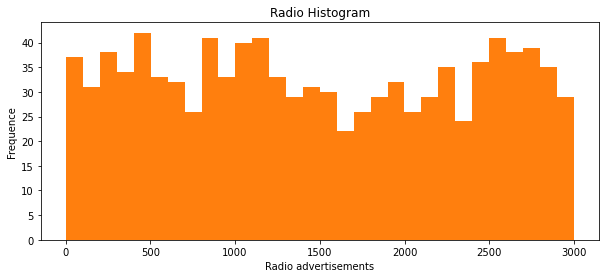

In [17]:
fig, ax = plt.subplots(figsize=(10,4))

ax.set_ylabel("Frequence")
ax.set_xlabel("Radio advertisements")
ax.set_title("Radio Histogram")
ax.hist(sales_X.Radio, bins=30, color="C1");

In [18]:
fig.savefig("Radio.png", dpi=300)

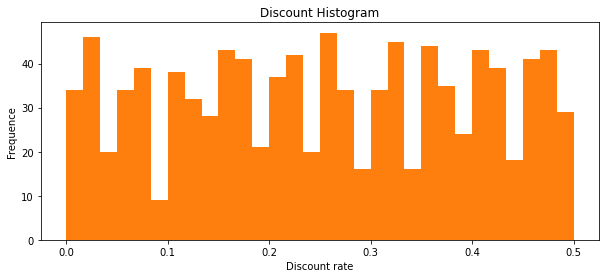

In [19]:
fig, ax = plt.subplots(figsize=(10,4))

ax.set_ylabel("Frequence")
ax.set_xlabel("Discount rate")
ax.set_title("Discount Histogram")
ax.hist(sales_X.Discount, bins=30, color="C1");

In [20]:
fig.savefig("Discount.png", dpi=300)

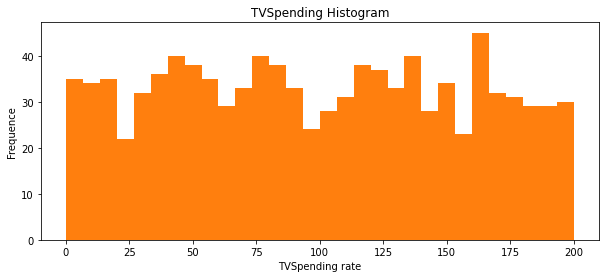

In [21]:
fig, ax = plt.subplots(figsize=(10,4))

ax.set_ylabel("Frequence")
ax.set_xlabel("TVSpending rate")
ax.set_title("TVSpending Histogram")
ax.hist(sales_X.TVSpending, bins=30, color="C1");

In [22]:
fig.savefig("TVSpending.png", dpi=300)

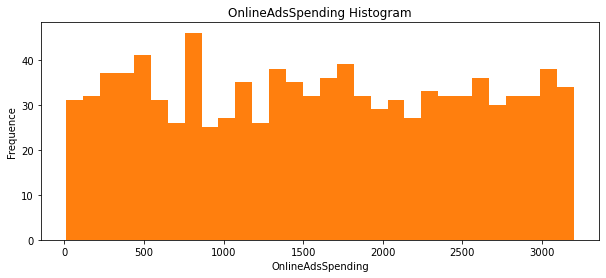

In [23]:
fig, ax = plt.subplots(figsize=(10,4))

ax.set_ylabel("Frequence")
ax.set_xlabel("OnlineAdsSpending")
ax.set_title("OnlineAdsSpending Histogram")
ax.hist(sales_X.OnlineAdsSpending, bins=30, color="C1");

In [24]:
fig.savefig("OnlineAdsSpending.png", dpi=300)

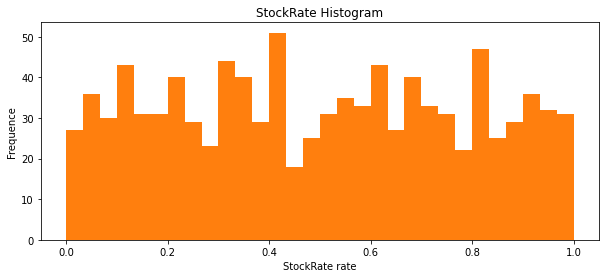

In [25]:
fig, ax = plt.subplots(figsize=(10,4))

ax.set_ylabel("Frequence")
ax.set_xlabel("StockRate rate")
ax.set_title("StockRate Histogram")
ax.hist(sales_X.StockRate, bins=30, color="C1");

In [26]:
fig.savefig("StockRate.png", dpi=300)

## Creating a normal linear regression model

In [27]:
train_X, valid_X, train_y, valid_y = train_test_split(sales_X, sales_y, train_size=0.6, random_state=1)

In [28]:
train_X.shape

(595, 7)

In [29]:
train_y.shape

(595,)

In [30]:
# Normal Linear Regression Model
sales_lm = LinearRegression()
sales_lm.fit(train_X, train_y)

LinearRegression()

In [31]:
# For training data
print('intercept ', sales_lm.intercept_)
print(pd.DataFrame({'Predictor': sales_X.columns, 'coefficient': 
  sales_lm.coef_}))

intercept  124990.34633225617
           Predictor   coefficient
0      InStrSpending   2882.179046
1           Discount   4425.186560
2         TVSpending    590.297975
3          StockRate -13609.314277
4              Price  -6487.981676
5              Radio      0.003681
6  OnlineAdsSpending      0.123053


In [32]:
sales_lm.predict(valid_X)

array([227135.63424127, 147305.88957433, 137616.80533247, 220732.91958097,
        -2006.91908866, 138276.42532093, 123045.5583153 , 156521.79163461,
       258170.20830531, 181845.37299892, 377139.45524134, 182185.97993307,
       211918.9943989 , 270713.43441022, 119522.95737353, 205916.70381319,
       189735.09211887, 223861.47428165, 158104.26140385, 171532.02612049,
       263494.46846712,  94644.93913454, 127053.31501205,  61736.78012178,
       190690.99931962, 308125.35030556, 289617.78788731, 104903.76805961,
        23005.23410329, 196205.53288564,  51021.60828517, 130446.5535119 ,
       233758.77264057, 123130.05200808, 198269.51268302, 306041.00459144,
       195611.23820409, 111792.33585478, 125956.73002836, 104463.89602194,
       305434.07563461, 166570.78013561, 299891.32236949, 183698.94851297,
        56674.76514451, 179110.63528077, 283925.14874293, 122513.70521073,
       169890.78667964,  38302.22395368, 131422.59629157, 215791.88544347,
       249284.35124102, 2

In [33]:
pred_y = sales_lm.predict(valid_X)
result = pd.DataFrame({'Predicted': pred_y, 
    'Actual': valid_y,
    'Error': valid_y - pred_y})
print(result.head(10))

         Predicted  Actual         Error
658  227135.634241  224539  -2596.634241
727  147305.889574  146017  -1288.889574
335  137616.805332  139837   2220.194668
678  220732.919581  219372  -1360.919581
94    -2006.919089    9036  11042.919089
301  138276.425321  138225    -51.425321
680  123045.558315  121483  -1562.558315
236  156521.791635  165427   8905.208365
108  258170.208305  260823   2652.791695
805  181845.372999  179657  -2188.372999


In [34]:
# With Validation Data
ME = (valid_y - pred_y).mean()
MAD = mean_absolute_error(valid_y,pred_y)
MAPE = mean_absolute_percentage_error(valid_y,pred_y)
MSE = mean_squared_error(valid_y,pred_y)
RMSE = np.sqrt(MSE)
R2 = r2_score(valid_y,pred_y)

print("Performance Metrics for VALIDATION Data")
print("Mean Error (ME)= {0:.2f}".format(ME))
print("Mean Absolute Deviation (MAD or MAE)= {0:.2f}".format(MAD))
print("Mean Absolute Percentage Error (MAPE)= {0:.2f}".format(100*MAPE))
print("Mean Squared Error (MSE)= {0:.2f}".format(MSE))
print("Root Mean Squared Error (RSME)= {0:.2f}".format(RMSE))
print("Coefficient of Determiniation (R-Square)= {0:.4f}".format(R2))

Performance Metrics for VALIDATION Data
Mean Error (ME)= 131.57
Mean Absolute Deviation (MAD or MAE)= 2326.67
Mean Absolute Percentage Error (MAPE)= 4.98
Mean Squared Error (MSE)= 9955756.74
Root Mean Squared Error (RSME)= 3155.27
Coefficient of Determiniation (R-Square)= 0.9985


## Creating a simple linear regression model

In [35]:
# Create standardized versions of using standard scaler
scaler = StandardScaler()
scaler.fit(train_X)

train_X_std = pd.DataFrame(scaler.transform(train_X),columns=train_X.columns,
index=train_X.index)
valid_X_std = pd.DataFrame(scaler.transform(valid_X),columns=valid_X.columns,
index=valid_X.index)

In [36]:
train_X_std.head()

,InStrSpending,Discount,TVSpending,StockRate,Price,Radio,OnlineAdsSpending
371,1.098052,0.518638,-0.220246,0.041404,-0.414712,-0.642083,-1.284900
45,0.598979,-1.250563,-0.532724,0.418302,-0.824811,-0.756032,-0.491152
762,-0.280725,0.858868,-1.220280,-1.329135,0.202141,1.318504,0.246595
578,-1.114432,0.722776,-0.705009,1.617524,0.782641,-0.884504,1.320985
446,-1.553709,-1.658840,-0.514560,0.486829,0.286205,-1.580484,-1.074661


In [37]:
train_X.head()

,InStrSpending,Discount,TVSpending,StockRate,Price,Radio,OnlineAdsSpending
371,49.55,0.33,88.78,0.51,11.03,881,461.80
45,40.87,0.07,71.06,0.62,7.42,779,1194.73
762,25.57,0.38,32.07,0.11,16.46,2636,1875.95
578,11.07,0.36,61.29,0.97,21.57,664,2868.02
446,3.43,0.01,72.09,0.64,17.20,41,655.93


In [47]:
lasso_cv = LassoCV(normalize=False,cv=5)
lasso_cv.fit(train_X_std, train_y)
print('Lasso-CV chosen regularization:  {:.2f}'.format(lasso_cv.alpha_))
# print coefficients
print('Intercept: {:.2f}'.format(lasso_cv.intercept_))

# Set the display options to print the dataframe
pd.options.display.float_format = '{:,.3f}'.format
print(pd.DataFrame({'Predictor': sales_X.columns, 'coefficient': lasso_cv.coef_}),'\n')
# Print fit metric R^2
print('R-squared of the fit with training data: {:.3f}'.format(lasso_cv.score(train_X_std,train_y)),'\n')

print("The prediction performance metrics for the VALIDATION data:")
las_valid_pred_y = lasso_cv.predict(valid_X_std)

ME = (valid_y - las_valid_pred_y).mean()
MAD = mean_absolute_error(valid_y,las_valid_pred_y)
MAPE = mean_absolute_percentage_error(valid_y,las_valid_pred_y)
MSE = mean_squared_error(valid_y,las_valid_pred_y)
RMSE = np.sqrt(MSE)

print("Performance Metrics for VALIDATION Data")
print("Mean Error (ME)= {0:.2f}".format(ME))
print("Mean Absolute Deviation (MAD or MAE)= {0:.2f}".format(MAD))
print("Mean Absolute Percentage Error (MAPE)= {0:.2f}".format(100*MAPE))
print("Mean Squared Error (MSE)= {0:.2f}".format(MSE))
print("Root Mean Squared Error (RSME)= {0:.2f}".format(RMSE))
print('R-squared of the fit with validation data: {:.3f}'.format(lasso_cv.score(valid_X_std,valid_y)),'\n')

Lasso-CV chosen regularization:  55.47
Intercept: 171846.46
           Predictor  coefficient
0      InStrSpending   50,068.674
1           Discount      590.745
2         TVSpending   33,422.491
3          StockRate   -3,921.518
4              Price  -57,054.024
5              Radio        0.000
6  OnlineAdsSpending       56.828 

R-squared of the fit with training data: 0.999 

The prediction performance metrics for the VALIDATION data:
Performance Metrics for VALIDATION Data
Mean Error (ME)= 119.19
Mean Absolute Deviation (MAD or MAE)= 2325.03
Mean Absolute Percentage Error (MAPE)= 4.87
Mean Squared Error (MSE)= 9858350.80
Root Mean Squared Error (RSME)= 3139.80
R-squared of the fit with validation data: 0.998 



## DT Regressor

In [39]:
# Back to using our cu
# Adapt grid based on result from initial grid search
param_grid = {
    'max_depth': list(range(2, 16)), 
    'min_samples_split': list(range(15, 35)), 
    'min_impurity_decrease': [0, 0.0002,0.0003,0.0005, 0.0006, 0.0007], 
}

# n_jobs=-1 means use all my available processes in parallel (computing resources)
gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Improved score: ${:.2f}'.format(gridSearch.best_score_))
print('Improved parameters: {}'.format(gridSearch.best_params_))

# Save the best found model with the "best" found parameters!
bestClassTree = gridSearch.best_estimator_

Improved score: $0.90
Improved parameters: {'max_depth': 9, 'min_impurity_decrease': 0, 'min_samples_split': 15}


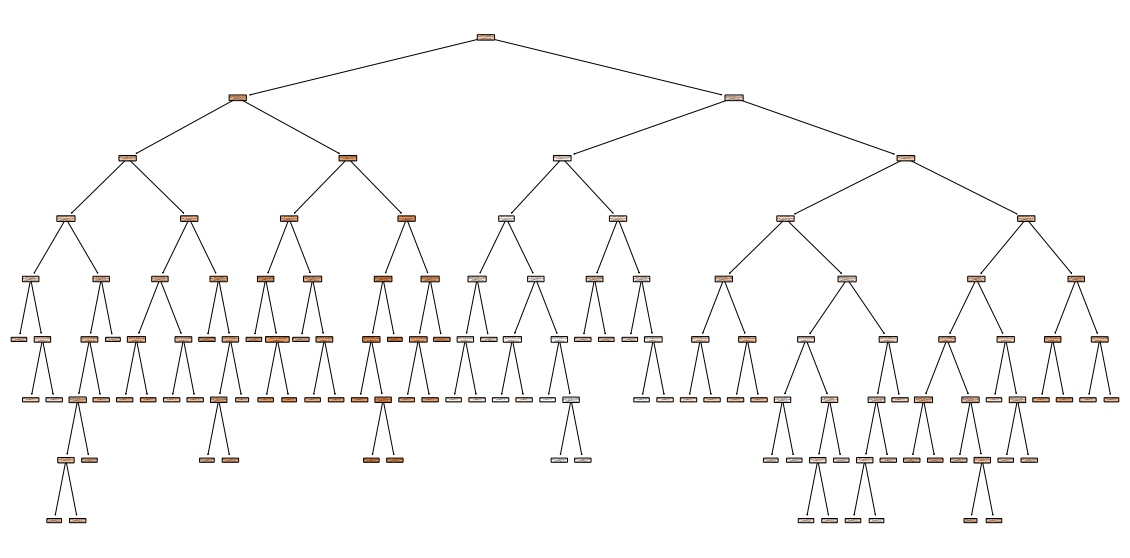

In [40]:
fig, ax = plt.subplots(figsize=(20, 10))
plot_tree(bestClassTree, filled=True,feature_names=train_X.columns.tolist(), proportion=False, rounded=True)
plt.show()

In [41]:
fig.savefig("DT.png")

In [43]:
train_pred_y = bestClassTree.predict(train_X)

In [44]:
# For Training Data
ME = (train_y - train_pred_y).mean()
MAD = mean_absolute_error(train_y,train_pred_y)
MAPE = mean_absolute_percentage_error(train_y,train_pred_y)
MSE = mean_squared_error(train_y,train_pred_y)
RMSE = np.sqrt(MSE)

print("Performance Metrics for Training Data")
print("Mean Error (ME)= {0:.2f}".format(ME))
print("Mean Absolute Deviation (MAD or MAE)= {0:.2f}".format(MAD))
print("Mean Absolute Percentage Error (MAPE)= {0:.2f}".format(100*MAPE))
print("Mean Squared Error (MSE)= {0:.2f}".format(MSE))
print("Root Mean Squared Error (RSME)= {0:.2f}".format(RMSE))

Performance Metrics for Training Data
Mean Error (ME)= 0.00
Mean Absolute Deviation (MAD or MAE)= 10807.43
Mean Absolute Percentage Error (MAPE)= 9.86
Mean Squared Error (MSE)= 192207082.04
Root Mean Squared Error (RSME)= 13863.88


In [45]:
valid_pred_y = bestClassTree.predict(valid_X)

In [46]:
# With Validation Data
ME = (valid_y - valid_pred_y).mean()
MAD = mean_absolute_error(valid_y,valid_pred_y)
MAPE = mean_absolute_percentage_error(valid_y,valid_pred_y)
MSE = mean_squared_error(valid_y,valid_pred_y)
RMSE = np.sqrt(MSE)
R2 = r2_score(valid_y,valid_pred_y)

print("Performance Metrics for VALIDATION Data")
print("Mean Error (ME)= {0:.2f}".format(ME))
print("Mean Absolute Deviation (MAD or MAE)= {0:.2f}".format(MAD))
print("Mean Absolute Percentage Error (MAPE)= {0:.2f}".format(100*MAPE))
print("Mean Squared Error (MSE)= {0:.2f}".format(MSE))
print("Root Mean Squared Error (RSME)= {0:.2f}".format(RMSE))
print("Coefficient of Determiniation (R-Square)= {0:.4f}".format(R2))

Performance Metrics for VALIDATION Data
Mean Error (ME)= -1040.22
Mean Absolute Deviation (MAD or MAE)= 19923.93
Mean Absolute Percentage Error (MAPE)= 18.99
Mean Squared Error (MSE)= 599803222.05
Root Mean Squared Error (RSME)= 24490.88
Coefficient of Determiniation (R-Square)= 0.9079
